In [1]:
# import operator
import linkpred
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from function import f_onion_decomposition
from function import f_graph
from function import f_results

import networkx as nx
import operator

from networkx.generators.line import line_graph
from networkx.generators.line import inverse_line_graph

from networkx.algorithms.centrality import degree_centrality 
from networkx.algorithms.centrality import eigenvector_centrality
from networkx.algorithms.centrality import closeness_centrality
from networkx.algorithms.centrality import betweenness_centrality

df = pd.read_table('dataset/socfb-nips-ego.txt', delim_whitespace=True, names=('A', 'B'))
G1 =nx.Graph()
edges = df[['A','B']].to_numpy()
G1.add_edges_from(edges)
G1.remove_edges_from(nx.selfloop_edges(G1))
G, matrix = f_graph.draw_graph(G1)
db_name="socfb-nips-ego"
# -------------------------

# df = pd.read_table('dataset/email/email_new.txt', delim_whitespace=True, names=('A', 'B'))
# G1 =nx.Graph()
# edges = df[['A','B']].to_numpy()
# G1.add_edges_from(edges)
# G1.remove_edges_from(nx.selfloop_edges(G1))
# G, matrix = f_graph.draw_graph(G1)
# db_name="email"
# # ----------------------------
# df = pd.read_table('dataset/facebook_combined.txt', delim_whitespace=True, names=('A', 'B'))
# G1 =nx.Graph()
# edges = df[['A','B']].to_numpy()
# G1.add_edges_from(edges)
# G1.remove_edges_from(nx.selfloop_edges(G1))
# G, matrix = f_graph.draw_graph(G1)
# db_name="facebook_combined"

# # dataset delfins
# G1 =nx.Graph()
# edges = nx.read_gml('dataset/dolphins.gml')
# G1.add_edges_from(edges.edges())
# list(edges.edges())
# G1.remove_edges_from(nx.selfloop_edges(G1))
# G, matrix = f_graph.draw_graph(G1)
# db_name="dolphins"

# dataset jazz
# df = pd.read_table('dataset/jazz/jazz.net', delim_whitespace=True, names=('A', 'B', 'C'))
# G1 =nx.Graph()
# edges = df[['A','B']].to_numpy()
# G1.add_edges_from(edges)
# # G1.remove_edges_from(nx.selfloop_edges(G1)
# G, matrix = f_graph.draw_graph(G1)
# db_name="jazz"

if nx.is_connected(G):
    
    edges=len(G.edges())
    node=len(G.nodes())
    print("number nodes G: ",len(G.nodes()),"\n number edges G: ", len(G.edges()))
    print("density:", ((edges)*2)/((node)*(node-1)))
else:
    print("graph not connected!!!")

number nodes G:  2888 
 number edges G:  2981
density: 0.0007150690793671507


In [2]:
def find_edge_with_lessDegree_avg(nonedges):
    avg_degrees = sum(d for n, d in G.degree()) / float(len(G.nodes()))
    list_degree = sorted(G.degree() , reverse=True, key=lambda x: x[1])
    print("@@@ avrage_degrees: ", avg_degrees)
    list_degree_less_avg=[]
    for node, degree in list_degree:
        nodeA = random.randint(0,(len(nonedges)-1))
        if degree<(avg_degrees):
            list_degree_less_avg.append((node, degree))


    list_edges_with_lessDegreeAvg = []
    for node in nonedges:
        a=-1
        b=-1
        for node_degree in list_degree_less_avg:
            if (node[0] == node_degree[0]) and a==-1 :
                a = node[0]             
            if (node[1] == node_degree[0]) and b==-1  :
                b = node[1]
        if a!=-1 and b!=-1:
            list_edges_with_lessDegreeAvg.append((a,b))
    #         print(a, b)
    return  list_edges_with_lessDegreeAvg

In [3]:
def smart_edge_add(G,list_node_anomaly, numEdgeAdded):
    list_degree = sorted(G.degree() , reverse=False, key=lambda x: x[1])
    print()
    G_new=G.copy()
    indx=0
    listEdgesAdded = []

    index_node=0
    j_id=0
    while (indx<numEdgeAdded):
    #     print(idx, item)
        if index_node<(len(list_node_anomaly)/15):
            i,j = list_node_anomaly[index_node], list_node_anomaly[index_node+1]
            if not(G.has_edge(i,j)):
                G_new.add_edge(i,j)
                listEdgesAdded.append((i,j))    
                print("j: ", j_id, i,j)
                j_id+=1
                indx+=1
        else:
            index_node=0
            G3, matrix = f_graph.draw_graph(G_new)
            list_node_anomaly = od_community(matrix)
        index_node+=1

    print(numEdgeAdded,"add anomaly!")
    return G_new, listEdgesAdded

In [4]:
def addEdgeRanom(G, numEdgeAdded, list_edges_with_lessDegreeAvg):
    '''
    Create a new random edge and delete one of its current edge if del_orig is True.
    :param graph: networkx graph
    :param del_orig: bool
    :return: networkx graph
    '''
    print("===================================================== add rendom egde")
    graph=G.copy()
    edges = list(graph.edges)
    
    listEdgesAdded = []
    num_list=len(list_edges_with_lessDegreeAvg)-1

    print("list_edges_with_lessDegreeAvg:",len(list_edges_with_lessDegreeAvg))
    for i in range(0, numEdgeAdded):
        
        # random edge choice
        nodeA = random.randint(0,num_list)
#         print("noda", nodeA, "num: ", num_list)
#         print(list_edges_with_lessDegreeAvg[nodeA])

        listEdgesAdded.append((list_edges_with_lessDegreeAvg[nodeA][0], list_edges_with_lessDegreeAvg[nodeA][1]))

        graph.add_edge(list_edges_with_lessDegreeAvg[nodeA][0], list_edges_with_lessDegreeAvg[nodeA][1])
        del list_edges_with_lessDegreeAvg[nodeA]
        num_list-=1
    print(numEdgeAdded, "edge added with Random to graph!!")
    return graph, listEdgesAdded

In [5]:
# nonedges = list(nx.non_edges(G))
# find_edge_with_lessDegree_avg(nonedges)

In [6]:
from operator import itemgetter, attrgetter
from networkx.algorithms.centrality import edge_betweenness_centrality
from networkx.algorithms.centrality import edge_load_centrality
from networkx.algorithms.centrality import edge_current_flow_betweenness_centrality
from networkx.algorithms.centrality import edge_current_flow_betweenness_centrality_subset

import random

def culucateTreeCenterality(graph, numEdgeAdded, listEdgesAdded):

    print("------------------------------- Betweenness Centrality")
    edgeBetweennessCentrality = edge_betweenness_centrality(graph)
    i=0
    numberFoundAnomalyEdge=0
    classEdge_betweenness_centrality=[]
    find=False
    for k in sorted(edgeBetweennessCentrality, key=edgeBetweennessCentrality.get, reverse=False):
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_betweenness_centrality.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeBetweennessCentrality[k])
        i+=1
        if not find:
            classEdge_betweenness_centrality.append(0)
        
        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    print("------------------------------- Load Centrality")
    edgeLoadCentrality = edge_load_centrality(graph)
    i=0
    numberFoundAnomalyEdge=0
    classEdge_load_centrality=[]
    find=False
    for k in sorted(edgeLoadCentrality, key=edgeLoadCentrality.get, reverse=False):
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
#                 print("K: ", k[0], "index", node[0])
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_load_centrality.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeLoadCentrality[k])
        i+=1
        if not find:
            classEdge_load_centrality.append(0)
        
        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    print("------------------------------- Random Walk Betweenness Centrality")
    currentFlowBetweennessCentrality = edge_current_flow_betweenness_centrality(graph)
    i=0
    numberFoundAnomalyEdge=0
    classEdge_flow_betweenness_centrality=[]
    find=False
    for k in sorted(currentFlowBetweennessCentrality, key=currentFlowBetweennessCentrality.get, reverse=True):
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,currentFlowBetweennessCentrality[k])
                    classEdge_flow_betweenness_centrality.append(1)
                    find=True
        i+=1
        if not find:
            classEdge_flow_betweenness_centrality.append(0)

    print(numberFoundAnomalyEdge, "found anomaly edge!") 
    return classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality

In [7]:
def funs_centrality(G, numEdgeAdded, listEdgesAdded):
    # اجرای الگوریتم‌های مرکزیت
    classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality = culucateTreeCenterality(G,numEdgeAdded, listEdgesAdded)

    # nx.draw(new_graph, with_labels=True)
    # plt.show()
    return classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality


In [8]:
def CommonNeighbours(G_invers,numEdgeAdded, listEdgesAdded):
    negative_CommonNeighbours = linkpred.predictors.CommonNeighbours(G_invers, excluded=G_invers.edges())
    negative_CommonNeighbours_results = negative_CommonNeighbours.predict()

    negative_CommonNeighbours_results= sorted(negative_CommonNeighbours_results.items() , reverse=True, key=lambda x: x[1])
    len(negative_CommonNeighbours_results)

    # compare result with radnom edges add

    classEdge_CommonNeighbours=[]
    i=0
    numberFoundAnomalyEdge=0
    find=False
    for edge,value in negative_CommonNeighbours_results:
        find=False
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_CommonNeighbours.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,value)
        i+=1
        if not find:
            classEdge_CommonNeighbours.append(0)

    
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    return classEdge_CommonNeighbours

In [9]:
def Jaccard(G_invers,numEdgeAdded, listEdgesAdded):
    negative_Jaccard = linkpred.predictors.Jaccard(G_invers, excluded=G_invers.edges())
    negative_Jaccard_results = negative_Jaccard.predict()

    negative_Jaccard_results= sorted(negative_Jaccard_results.items() , reverse=True, key=lambda x: x[1])
#     print("number of link predict negative: ", len(negative_Jaccard_results))
    # negative_Jaccard_results

    i=0
    numberFoundAnomalyEdge=0
    classEdge_JaccardResults=[]
    find=False
    for edge,value in negative_Jaccard_results:
        find=False
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_JaccardResults.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,value)
        i+=1
        if not find:
            classEdge_JaccardResults.append(0)
        
        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    return classEdge_JaccardResults

In [10]:
def AdamicAdar(G_invers,numEdgeAdded, listEdgesAdded):
    negative_AdamicAdar = linkpred.predictors.AdamicAdar(G_invers, excluded=G_invers.edges())
    negative_AdamicAdar_results = negative_AdamicAdar.predict()

    negative_AdamicAdar_results= sorted(negative_AdamicAdar_results.items() , reverse=True, key=lambda x: x[1])
#     print("number of link predict negative: ", len(negative_AdamicAdar_results))

    i=0
    numberFoundAnomalyEdge=0
    classEdge_AdamicAdarResults=[]
    find=False
    for edge,value in negative_AdamicAdar_results:
        find=False
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_AdamicAdarResults.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,value)
        i+=1
        if not find:
            classEdge_AdamicAdarResults.append(0)

        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    return classEdge_AdamicAdarResults

In [11]:
def preferentialAttachment(G_invers,numEdgeAdded, listEdgesAdded):
    negative_preferential_attachment = list(nx.preferential_attachment(G_invers))
    negative_preferential_attachment_results= sorted(negative_preferential_attachment , reverse=True, key=lambda x: x[2])
#     print("number of link predict negative: ", len(negative_preferential_attachment_results))

    i=0
    numberFoundAnomalyEdge=0
    classEdge_preferentialAttachment=[]
    find=False
    for edge in negative_preferential_attachment_results:
        find=False
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_preferentialAttachment.append(1)
                    find=True
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node)
        i+=1
        if not find:
            classEdge_preferentialAttachment.append(0)

        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    return classEdge_preferentialAttachment

In [12]:
def katz(G, numEdgeAdded, listEdgesAdded, beta, cutoff):
    listAllEdgesKatz = []
    sum=0
    for i,j in G.edges():
        sum=0
        for path in nx.all_simple_paths(G, source=i, target=j,  cutoff=cutoff):
                sum+=1
        listAllEdgesKatz.append((i, j, (sum*beta)))

    listAllEdgesKatz_sorted = sorted(listAllEdgesKatz , reverse=True, key=lambda x: x[2])

    i=0
    numberFoundAnomalyEdge=0
    classEdge_Katz=[]
    find=False
    for edge in listAllEdgesKatz_sorted:
        find=False
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_Katz.append(1)
                    find=True
    #                 print("num: ", numberFoundAnomalyEdge, "index", i,": ", node)
        i+=1
        if not find:
            classEdge_Katz.append(0)

    print(numberFoundAnomalyEdge, "found anomaly edge!")

    return classEdge_Katz

In [13]:
def degreeCentrality(G, numEdgeAdded, listEdgesAdded):
    DC = degree_centrality(G)
    sorted_DC = sorted(DC.items(), key=operator.itemgetter(1))
    
    i=0
    numberFoundAnomalyEdge=0
    classEdge_degreeCentrality=[]
    find=False
    for k,v in sorted_DC:
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
    #       print("K: ", k[0], "index", node[0])
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_degreeCentrality.append(1)
                    find=True
    #               print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeLoadCentrality[k])  
        i+=1
        if not find:
            classEdge_degreeCentrality.append(0)
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    return classEdge_degreeCentrality

In [14]:
def eigenvectorCentrality(G, numEdgeAdded, listEdgesAdded):
    EC = eigenvector_centrality(G)
    sorted_EC = sorted(EC.items(), key=operator.itemgetter(1))

    i=0
    numberFoundAnomalyEdge=0
    classEdge_eigenvectorCentrality=[]
    find=False
    for k,v in sorted_EC:
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
    #       print("K: ", k[0], "index", node[0])
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_eigenvectorCentrality.append(1)
                    find=True
    #               print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeLoadCentrality[k])  
        i+=1
        if not find:
            classEdge_eigenvectorCentrality.append(0)
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    return classEdge_eigenvectorCentrality

In [15]:
def closenessCentrality(G, numEdgeAdded, listEdgesAdded):
    CC = closeness_centrality(G)
    sorted_CC = sorted(CC.items(), key=operator.itemgetter(1))

    i=0
    numberFoundAnomalyEdge=0
    classEdge_closenessCentrality=[]
    find=False
    for k,v in sorted_CC:
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
    #       print("K: ", k[0], "index", node[0])
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_closenessCentrality.append(1)
                    find=True
    #               print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeLoadCentrality[k])  
        i+=1
        if not find:
            classEdge_closenessCentrality.append(0)
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    return classEdge_closenessCentrality

In [16]:
def betweennessCentrality(G, numEdgeAdded, listEdgesAdded):
    BC = betweenness_centrality(G)
    sorted_BC = sorted(BC.items(), key=operator.itemgetter(1))

    i=0
    numberFoundAnomalyEdge=0
    classEdge_betweennessCentrality=[]
    find=False
    for k,v in sorted_BC:
        find=False
        if (i<numEdgeAdded) :
            for node in listEdgesAdded:
    #       print("K: ", k[0], "index", node[0])
                if (k[0]==node[0] and k[1]==node[1]) or (k[1]==node[0] and k[0]==node[1]):
                    numberFoundAnomalyEdge+=1
                    classEdge_betweennessCentrality.append(1)
                    find=True
    #               print("num: ", numberFoundAnomalyEdge, "index", i,": ", node,edgeLoadCentrality[k])  
        i+=1
        if not find:
            classEdge_betweennessCentrality.append(0)
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    
    return classEdge_betweennessCentrality

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def plot_maeasure(test, predict, name_algorim):
    
    accuracy = accuracy_score(test, predict)
    precision = precision_score(test, predict, average='micro')
    recall = recall_score(test, predict)
    fscore = f1_score(test, predict)
    
#     print("------------- ", name_algorim)
#     print("Accuracy : ", accuracy)
#     print("precision: ", precision)
#     print("recall   : ", recall)
#     print("F-Measure: ", fscore)
    return accuracy, precision, recall, fscore

In [18]:
def od_community(matrix):
    corelist, layerlist = f_onion_decomposition.compute(matrix)
#     print("core list:  ",  sorted(corelist))
#     print("layer list: ", sorted(layerlist))
    # Get the maximum element from a  array corelist
    maxElement = np.amax(corelist)
    list_nodes_anomaly = []
    num_comunity = 1
    index = 0
    while(num_comunity < maxElement+1):
        index = 0
        for core in corelist:
            if num_comunity == core:
                list_nodes_anomaly.append(index)
            index = index+1
        num_comunity = num_comunity+1
    print(list_nodes_anomaly)
    return list_nodes_anomaly

In [19]:
def all_method(G, numEdgeAdded, beta_katz, cutoff_katz):
    print("===================================================== Number Node and Edge main Graph")
    print("number nodes G: ",len(G.nodes()),"\n number edges G: ", len(G.edges()))
#     METHOD 1 ADDED EDGE
#     new_graph, listEdgesAdded = addEdgeRanom(G, numEdgeAdded, list_edges_with_lessDegreeAvg)

# METHOD 2 EDDED EDGE
    G3, matrix = f_graph.draw_graph(G)
    list_node_anomaly = od_community(matrix)
    new_graph, listEdgesAdded = smart_edge_add(G, list_node_anomaly,numEdgeAdded)
    print("----listEdgesAdded: ", len(listEdgesAdded))
    print("===================================================== Number Node and Edge Before Added Edge")
    print("number nodes G: ",len(new_graph.nodes()),"\n number edges G: ", len(new_graph.edges()))
    # ---------------------------------------------------------------
    G_invers, matrix_invers = f_graph.matrix_invers(new_graph)
    # matrix_invers
    len(G_invers.edges())

    # ---------------------------------------------------------------
    # درست کردن کلاس برای معیارهای ارزیابی(یال‌های که به صورت تصادفی اضفه شدنه‌اند به کلاس 1 تبدیل می‌شوند)(دیتای تست)
    trainAddedEdge = []
    for node in listEdgesAdded:
        trainAddedEdge.append(1)
    len(trainAddedEdge)


    print("===================================================== methods centrality")
    classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality=  funs_centrality(new_graph, numEdgeAdded,listEdgesAdded)

    print("")
    print("===================================================== methods Link Prediction")
    print("------------------------------- Common Neighbours")
    classEdge_CommonNeighbours = CommonNeighbours(G_invers,numEdgeAdded, listEdgesAdded)

    print("------------------------------- Jaccard Index")
    classEdge_JaccardResults = Jaccard(G_invers,numEdgeAdded, listEdgesAdded)

    print("------------------------------- Adamic Adar")
    classEdge_AdamicAdarResults = AdamicAdar(G_invers,numEdgeAdded, listEdgesAdded)

    print("------------------------------- preferential Attachment")
    classEdge_preferentialAttachment = preferentialAttachment(G_invers,numEdgeAdded, listEdgesAdded)

    print("------------------------------- katz similarity")
    classEdge_katz = katz(new_graph, numEdgeAdded, listEdgesAdded, beta_katz, cutoff_katz)
    
# --------------------------------------------------------------------------------------------
    LineGIn = (line_graph(new_graph))
    print("***************** Line Graph done!")
    print("------------------------------- degree Centrality")
    classEdge_degreeCentrality=degreeCentrality(LineGIn, numEdgeAdded, listEdgesAdded)
    
    print("------------------------------- eigenvector Centrality")
    classEdge_eigenvectorCentrality=eigenvectorCentrality(LineGIn, numEdgeAdded, listEdgesAdded)
    
    print("------------------------------- closeness Centrality")
    classEdge_closenessCentrality=closenessCentrality(LineGIn, numEdgeAdded, listEdgesAdded)
    
    print("------------------------------- betweenness Centrality")
    classEdge_betweennessCentrality=betweennessCentrality(LineGIn, numEdgeAdded, listEdgesAdded)
    
    return trainAddedEdge, classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality, classEdge_CommonNeighbours, classEdge_JaccardResults, classEdge_AdamicAdarResults, classEdge_preferentialAttachment, classEdge_katz,classEdge_degreeCentrality,classEdge_eigenvectorCentrality,classEdge_closenessCentrality,classEdge_betweennessCentrality

In [20]:
import matplotlib.pyplot as plot
def plot_histogram(accuracy, precision, recall, fscore):
    measure = [accuracy, precision, recall, fscore]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['accuracy','precision','recall', 'fscore']
    ax.bar(langs,measure)
    plt.show()
#     plt.xticks(measure, ['accuracy','precision','recall', 'fscore'])
    
def print_measure(accuracy, precision, recall, fscore, name_algorim):
    accuracy_avg = accuracy
    precision_avg = precision
    recall_avg = recall
    fscore_avg = fscore
    
#     plot_histogram(accuracy_avg, precision_avg, recall_avg, recall_avg)
    
    print("--------------------- ", name_algorim)
    print("Accuracy : ", accuracy_avg)
    print("precision: ", precision_avg)
    print("recall   : ", recall_avg)
    print("F-Measure: ", fscore_avg)
    

In [21]:
def calucate_betweenness_centrality_edge(trainAddedEdge, classEdge_load_centrality, numEdgeAdded):
    #   betweenness centrality   
    accuracy_betweenness_centrality, precision_betweenness_centrality, recall_betweenness_centrality, fscore_betweenness_centrality= plot_maeasure(trainAddedEdge, classEdge_betweenness_centrality[:numEdgeAdded],"Betweenness Centrality")
    
    return accuracy_betweenness_centrality, precision_betweenness_centrality, recall_betweenness_centrality, fscore_betweenness_centrality

In [22]:
def calucate_load_centrality_edge(trainAddedEdge, classEdge_load_centrality, numEdgeAdded):
    accuracy_load_centrality, precision_load_centrality, recall_load_centrality, fscore_load_centrality= plot_maeasure(trainAddedEdge, classEdge_load_centrality[:numEdgeAdded],"Load Centrality")
   
    return accuracy_load_centrality, precision_load_centrality, recall_load_centrality, fscore_load_centrality

In [23]:
def calucate_flow_betweenness_centrality_edge(trainAddedEdge, classEdge_flow_betweenness_centrality, numEdgeAdded):
    accuracy_flow_betweenness_centrality, precision_flow_betweenness_centrality, recall_flow_betweenness_centrality, fscore_flow_betweenness_centrality= plot_maeasure(trainAddedEdge,classEdge_flow_betweenness_centrality[:numEdgeAdded],"Random Walk Betweenness Centrality")
    
    return accuracy_flow_betweenness_centrality, precision_flow_betweenness_centrality, recall_flow_betweenness_centrality, fscore_flow_betweenness_centrality

In [24]:
def calucate_CommonNeighbours(trainAddedEdge, classEdge_CommonNeighbours, numEdgeAdded):
    accuracy_CommonNeighbours, precision_CommonNeighbours, recall_CommonNeighbours, fscore_CommonNeighbours= plot_maeasure(trainAddedEdge,classEdge_CommonNeighbours[:numEdgeAdded],"Common Neighbours")
    
    return accuracy_CommonNeighbours, precision_CommonNeighbours, recall_CommonNeighbours, fscore_CommonNeighbours

In [25]:
def calucate_JaccardResults(trainAddedEdge, classEdge_JaccardResults, numEdgeAdded):
    accuracy_JaccardResults, precision_JaccardResults, recall_JaccardResults, fscore_JaccardResults= plot_maeasure(trainAddedEdge,classEdge_JaccardResults[:numEdgeAdded],"Jaccard Results")
    
    return accuracy_JaccardResults, precision_JaccardResults, recall_JaccardResults, fscore_JaccardResults

In [26]:
def calucate_AdamicAdarResults(trainAddedEdge, classEdge_AdamicAdarResults, numEdgeAdded):

    accuracy_AdamicAdarResults, precision_AdamicAdarResults, recall_AdamicAdarResults, fscore_AdamicAdarResults = plot_maeasure(trainAddedEdge,classEdge_AdamicAdarResults[:numEdgeAdded],"cAdamic AdarResults")
    return accuracy_AdamicAdarResults, precision_AdamicAdarResults, recall_AdamicAdarResults, fscore_AdamicAdarResults

In [27]:
def calucate_preferentialAttachment(trainAddedEdge, classEdge_preferentialAttachment, numEdgeAdded):
    accuracy_preferentialAttachment, precision_preferentialAttachment, recall_preferentialAttachment, fscore_preferentialAttachment= plot_maeasure(trainAddedEdge,classEdge_preferentialAttachment[:numEdgeAdded],"preferential Attachment")
    
    return accuracy_preferentialAttachment, precision_preferentialAttachment, recall_preferentialAttachment, fscore_preferentialAttachment

In [28]:
def calucate_katz(trainAddedEdge, classEdge_katz, numEdgeAdded):
    accuracy_katz, precision_katz, recall_katz, fscore_katz = plot_maeasure(trainAddedEdge,classEdge_katz[:numEdgeAdded],"katz similarity")
    return accuracy_katz, precision_katz, recall_katz, fscore_katz

In [29]:
def calucate_eigenvectorCentrality(trainAddedEdge, classEdge_eigenvectorCentrality, numEdgeAdded):

    accuracy_eigenvectorCentrality, precision_eigenvectorCentrality, recall_eigenvectorCentrality, fscore_eigenvectorCentrality = plot_maeasure(trainAddedEdge,classEdge_eigenvectorCentrality[:numEdgeAdded],"eigenvector Centrality")
    return accuracy_eigenvectorCentrality, precision_eigenvectorCentrality, recall_eigenvectorCentrality, fscore_eigenvectorCentrality 

In [30]:
def calucate_degreeCentrality(trainAddedEdge, classEdge_degreeCentrality, numEdgeAdded):

    accuracy_degreeCentrality, precision_degreeCentrality, recall_degreeCentrality, fscore_degreeCentrality = plot_maeasure(trainAddedEdge,classEdge_degreeCentrality[:numEdgeAdded],"degree Centrality")
    return accuracy_degreeCentrality, precision_degreeCentrality, recall_degreeCentrality, fscore_degreeCentrality

In [31]:
def calucate_closenessCentrality(trainAddedEdge, classEdge_closenessCentrality, numEdgeAdded):

    accuracy_closenessCentrality, precision_closenessCentrality, recall_closenessCentrality, fscore_closenessCentrality = plot_maeasure(trainAddedEdge,classEdge_closenessCentrality[:numEdgeAdded],"closeness Centrality")
    return accuracy_closenessCentrality, precision_closenessCentrality, recall_closenessCentrality, fscore_closenessCentrality

In [32]:
def calucate_betweennessCentrality(trainAddedEdge, classEdge_betweennessCentrality, numEdgeAdded):

    accuracy_betweennessCentrality, precision_betweennessCentrality, recall_betweennessCentrality, fscore_betweennessCentrality = plot_maeasure(trainAddedEdge,classEdge_betweennessCentrality[:numEdgeAdded],"cbetweenness Centrality")
    return accuracy_betweennessCentrality, precision_betweennessCentrality, recall_betweennessCentrality, fscore_betweennessCentrality

In [33]:
import matplotlib.colors as mcolors

def plot_result(accuracy_CN_Edge,
                accuracy_PA_Edge,
                accuracy_AA_Edge,
                accuracy_JC_Edge,
                accuracy_BC_Edge,
                accuracy_LD_Edge, 
                accuracy_RW_Edge, 
                accuracy_Ktz_Edge,
                accuracy_DC_Node,
                accuracy_EC_Node,
                accuracy_CC_Node,
                accuracy_BC_Node, msg_nameMetric, name_dataset):

    line_chart1 = plt.plot(range(1,len(accuracy_CN_Edge)+1), accuracy_CN_Edge, c='#980505'  )
    line_chart2 = plt.plot(range(1,len(accuracy_PA_Edge)+1), accuracy_PA_Edge,c='#ff8c31')
    line_chart3 = plt.plot(range(1,len(accuracy_AA_Edge)+1), accuracy_AA_Edge,'g')
    line_chart4 = plt.plot(range(1,len(accuracy_JC_Edge)+1), accuracy_JC_Edge, 'c')
    line_chart5 = plt.plot(range(1,len(accuracy_BC_Edge)+1), accuracy_BC_Edge, 'y')
    line_chart6 = plt.plot(range(1,len(accuracy_LD_Edge)+1), accuracy_LD_Edge, 'k')
    line_chart7 = plt.plot(range(1,len(accuracy_RW_Edge)+1), accuracy_RW_Edge, c='#ff00d9')
    line_chart8 = plt.plot(range(1,len(accuracy_Ktz_Edge)+1), accuracy_Ktz_Edge, c='#fff531')
    line_chart9 = plt.plot(range(1,len(accuracy_DC_Node)+1), accuracy_DC_Node, c='#acff73')
    line_chart10 = plt.plot(range(1,len(accuracy_EC_Node)+1), accuracy_EC_Node, '#88ffd1')
    line_chart11 = plt.plot(range(1,len(accuracy_CC_Node)+1), accuracy_CC_Node, c='#a0d1ff')
    line_chart12 = plt.plot(range(1,len(accuracy_BC_Node)+1), accuracy_BC_Node, c='#8d03ff')

    

    axes = plt.axes()
    axes.set_ylim([0, 1])
    axes.set_xlim([1,7])
#     axes.set_xbound(lower=0.0, upper=5.00)
    # plt.axis([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0])
    # plt.style.use('ggplot')
    plt.title(msg_nameMetric,fontsize=20)
    plt.xlabel('Number of added edges(up to 21% from the all)',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.legend(['CN','PA', 'AA','JC','BCE','LD','RW','ktz','DC','EC','CC','BC'], loc=0,fontsize=12)
    # plt.style.use(['dark_background', 'presentation'])
    plt.grid(True)
    name_fig=name_dataset+'.png'
    plt.savefig(name_fig)
    plt.show()


In [34]:
def percentage(percent, whole):
    return int((percent * whole) / 100.0)

In [35]:
accuracy_CN_Edge = []
accuracy_PA_Edge = []
accuracy_AA_Edge = []
accuracy_JC_Edge = []
accuracy_BC_Edge = []
accuracy_LD_Edge = []
accuracy_RW_Edge = [] 
accuracy_Ktz_Edge = []
accuracy_DC_Node = []
accuracy_EC_Node = []
accuracy_CC_Node = []
accuracy_BC_Node = []

In [ ]:
i=9
while(i<10):
    percent_10_edges = percentage(i, len(G.edges()))

    # find node with degree less of avrage degree
    # nonedges = list(nx.non_edges(G))
    # list_edges_with_lessDegreeAvg = find_edge_with_lessDegree_avg(nonedges)

    # number 
    numEdgeAdded = percent_10_edges

    # parametr katz
    cutoff_katz = 3
    beta_katz = 0.004

    # -------------- run all method
    # out put: return binery class pridect all method
    trainAddedEdge, classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality, classEdge_CommonNeighbours, classEdge_JaccardResults, classEdge_AdamicAdarResults, classEdge_preferentialAttachment, classEdge_katz,classEdge_degreeCentrality,classEdge_eigenvectorCentrality,classEdge_closenessCentrality,classEdge_betweennessCentrality = all_method(G, numEdgeAdded, beta_katz, cutoff_katz)


    # -----------------------------------------------------
    # betweenness_centrality

    accuracy_betweenness_centrality, precision_betweenness_centrality, recall_betweenness_centrality, fscore_betweenness_centrality = calucate_betweenness_centrality_edge(trainAddedEdge, classEdge_betweenness_centrality, numEdgeAdded)
    if (accuracy_betweenness_centrality>0):
        accuracy_BC_Edge.append(accuracy_betweenness_centrality)
    else:
        accuracy_BC_Edge.append(0)

    # # load_centrality
    accuracy_load_centrality, precision_load_centrality, recall_load_centrality, fscore_load_centrality = calucate_load_centrality_edge(trainAddedEdge, classEdge_load_centrality, numEdgeAdded)
    if (accuracy_load_centrality>0):
        accuracy_LD_Edge.append(accuracy_load_centrality)
    else:
        accuracy_LD_Edge.append(0)

    # # random walk centerality
    accuracy_flow_betweenness_centrality, precision_flow_betweenness_centrality, recall_flow_betweenness_centrality, fscore_flow_betweenness_centrality = calucate_flow_betweenness_centrality_edge(trainAddedEdge, classEdge_flow_betweenness_centrality, numEdgeAdded)
    if (accuracy_flow_betweenness_centrality>0):
        accuracy_RW_Edge.append(accuracy_flow_betweenness_centrality)
    else:
        accuracy_RW_Edge.append(0)
        
    # # Common Neighbours
    accuracy_CommonNeighbours, precision_CommonNeighbours, recall_CommonNeighbours, fscore_CommonNeighbours = calucate_CommonNeighbours(trainAddedEdge, classEdge_CommonNeighbours, numEdgeAdded)
    if (accuracy_CommonNeighbours>0):
        accuracy_CN_Edge.append(accuracy_CommonNeighbours)
    else:
        accuracy_CN_Edge.append(0)
        
    # Jaccard Results
    accuracy_JaccardResults, precision_JaccardResults, recall_JaccardResults, fscore_JaccardResults =calucate_flow_betweenness_centrality_edge(trainAddedEdge, classEdge_JaccardResults, numEdgeAdded)
    if (accuracy_JaccardResults>0):
        accuracy_JC_Edge.append(accuracy_JaccardResults)
    else:
        accuracy_JC_Edge.append(0)
        
    # Adamic AdarResults
    accuracy_AdamicAdarResults, precision_AdamicAdarResults, recall_AdamicAdarResults, fscore_AdamicAdarResults= calucate_AdamicAdarResults(trainAddedEdge, classEdge_AdamicAdarResults, numEdgeAdded)
    if (accuracy_AdamicAdarResults>0):
        accuracy_AA_Edge.append(accuracy_AdamicAdarResults)
    else:
        accuracy_AA_Edge.append(0)
        
    # preferential Attachment
    accuracy_preferentialAttachment, precision_preferentialAttachment, recall_preferentialAttachment, fscore_preferentialAttachment = calucate_preferentialAttachment(trainAddedEdge, classEdge_preferentialAttachment, numEdgeAdded)
    if (accuracy_preferentialAttachment>0):
        accuracy_PA_Edge.append(accuracy_preferentialAttachment)
    else:
        accuracy_PA_Edge.append(0)
        
    # katz
    accuracy_katz, precision_katz, recall_katz, fscore_katz = calucate_katz(trainAddedEdge, classEdge_katz, numEdgeAdded)
    if (accuracy_katz>0):
        accuracy_Ktz_Edge.append(accuracy_katz)
    else:
        accuracy_Ktz_Edge.append(0)
        
    # eigenvector Centrality
    accuracy_eigenvectorCentrality, precision_eigenvectorCentrality, recall_eigenvectorCentrality, fscore_eigenvectorCentrality = calucate_eigenvectorCentrality(trainAddedEdge, classEdge_eigenvectorCentrality, numEdgeAdded)
    if (accuracy_eigenvectorCentrality>0):
        accuracy_EC_Node.append(accuracy_eigenvectorCentrality)
    else:
        accuracy_EC_Node.append(0)
        
    # degree Centrality
    accuracy_degreeCentrality, precision_degreeCentrality, recall_degreeCentrality, fscore_degreeCentrality = calucate_degreeCentrality(trainAddedEdge, classEdge_degreeCentrality, numEdgeAdded)
    if (accuracy_degreeCentrality>0):
        accuracy_DC_Node.append(accuracy_degreeCentrality)
    else:
        accuracy_DC_Node.append(0)
        
    # closeness Centrality
    accuracy_closenessCentrality, precision_closenessCentrality, recall_closenessCentrality, fscore_closenessCentrality = calucate_closenessCentrality(trainAddedEdge, classEdge_closenessCentrality, numEdgeAdded)
    if (accuracy_closenessCentrality>0):
        accuracy_CC_Node.append(accuracy_closenessCentrality)
    else:
        accuracy_CC_Node.append(0)
        
    # calucate_betweennessCentrality
    accuracy_betweennessCentrality, precision_betweennessCentrality, recall_betweennessCentrality, fscore_betweennessCentrality = calucate_katz(trainAddedEdge, classEdge_betweennessCentrality, numEdgeAdded)
    if (accuracy_betweennessCentrality>0):
        accuracy_BC_Node.append(accuracy_betweennessCentrality)
    else:
        accuracy_BC_Node.append(0)
        
    i+=3

===================================================== Number Node and Edge main Graph
number nodes G:  2888 
 number edges G:  2981
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 1

[199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401,

===================================================== methods centrality
------------------------------- Betweenness Centrality
268 found anomaly edge!
------------------------------- Load Centrality
268 found anomaly edge!
------------------------------- Random Walk Betweenness Centrality
0 found anomaly edge!

===================================================== methods Link Prediction
------------------------------- Common Neighbours


In [41]:
print(accuracy_CN_Edge,"\n",
                accuracy_PA_Edge,"\n",
                accuracy_AA_Edge,"\n",
                accuracy_JC_Edge,"\n",
                accuracy_BC_Edge,"\n",
                accuracy_LD_Edge, "\n",
                accuracy_RW_Edge, "\n",
                accuracy_Ktz_Edge,"\n",
                accuracy_DC_Node,"\n",
                accuracy_EC_Node,"\n",
                accuracy_CC_Node,"\n",
                accuracy_BC_Node)

[0.8854895104895105] 
 [0.8994755244755245] 
 [0.8951048951048951] 
 [0.8076923076923077] 
 [0.31643356643356646] 
 [0.4143356643356643] 
 [0.6013986013986014] 
 [0] 
 [0.8933566433566433] 
 [0.7159090909090909] 
 [0.8120629370629371] 
 [0.5935314685314685]


In [71]:
# # email results
# accuracy_CN_Edge= [0.7914110429447853, 0.7767584097859327, 0.8122448979591836, 0.8149847094801224, 0.8347613219094248,0.8644240570846076,0.8854895104895105] 
# accuracy_PA_Edge= [0.8650306748466258, 0.7889908256880734, 0.8326530612244898, 0.8287461773700305, 0.8592411260709915,0.8807339449541285,0.8994755244755245] 
# accuracy_AA_Edge= [0.8159509202453987, 0.7798165137614679, 0.8163265306122449, 0.8211009174311926, 0.8433292533659731,0.8746177370030581,0.8951048951048951] 
# accuracy_JC_Edge= [0.6625766871165644, 0.6697247706422018, 0.7612244897959184, 0.72782874617737, 0.7711138310893513,0.781855249745158,0.8076923076923077] 
# accuracy_BC_Edge= [0.15950920245398773, 0.20795107033639143, 0.22448979591836735, 0.24617737003058104, 0.27906976744186046,0.2966360856269113,0.31643356643356646] 
# accuracy_LD_Edge= [0.2822085889570552, 0.3333333333333333, 0.3346938775510204, 0.3486238532110092, 0.390452876376989,0.3965341488277268,0.4143356643356643] 
# accuracy_RW_Edge= [0.36809815950920244, 0.42507645259938837, 0.44693877551020406, 0.4525993883792049, 0.5079559363525091,0.5575942915392457,0.6013986013986014] 
# accuracy_Ktz_Edge= [0, 0, 0, 0, 0, 0,0] 
# accuracy_DC_Node= [0.8343558282208589, 0.7859327217125383, 0.8183673469387756, 0.8256880733944955, 0.8543451652386781,0.8746177370030581,0.8933566433566433] 
# accuracy_EC_Node= [0.5705521472392638, 0.5718654434250765, 0.6204081632653061, 0.6284403669724771, 0.6511627906976745,0.6850152905198776,0.7159090909090909] 
# accuracy_CC_Node= [0.6748466257668712, 0.654434250764526, 0.7163265306122449, 0.72782874617737, 0.7490820073439413,0.7849133537206932,0.8120629370629371] 
# accuracy_BC_Node= [0.2392638036809816, 0.3333333333333333, 0.4306122448979592, 0.4892966360856269, 0.5263157894736842,0.5718654434250765,0.5935314685314685]


C:\Users\click\Anaconda31\envs\py37\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


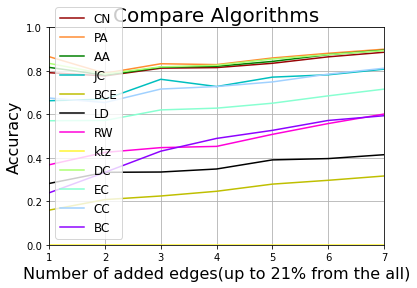

In [72]:
title_name="Compare Algorithms"
name_dataset="Emil_comapre"
plot_result(accuracy_CN_Edge,
                accuracy_PA_Edge,
                accuracy_AA_Edge,
                accuracy_JC_Edge,
                accuracy_BC_Edge,
                accuracy_LD_Edge, 
                accuracy_RW_Edge, 
                accuracy_Ktz_Edge,
                accuracy_DC_Node,
                accuracy_EC_Node,
                accuracy_CC_Node,
                accuracy_BC_Node, title_name, name_dataset)

In [ ]:
print_measure(accuracy_betweenness_centrality, precision_betweenness_centrality, recall_betweenness_centrality, fscore_betweenness_centrality,"betweenness_centrality")
print_measure(accuracy_load_centrality, precision_load_centrality, recall_load_centrality, fscore_load_centrality, " load centrality")
print_measure(accuracy_flow_betweenness_centrality, precision_flow_betweenness_centrality, recall_flow_betweenness_centrality, fscore_flow_betweenness_centrality, " random walk centerality")
print_measure(accuracy_CommonNeighbours, precision_CommonNeighbours, recall_CommonNeighbours, fscore_CommonNeighbours, " Common Neighbours")
print_measure(accuracy_JaccardResults, precision_JaccardResults, recall_JaccardResults, fscore_JaccardResults, " Jaccard Index")
print_measure(accuracy_AdamicAdarResults, precision_AdamicAdarResults, recall_AdamicAdarResults, fscore_AdamicAdarResults, " Adamic AdarResults")
print_measure(accuracy_preferentialAttachment, precision_preferentialAttachment, recall_preferentialAttachment, fscore_preferentialAttachment, " preferential Attachment")
print_measure(accuracy_katz, precision_katz, recall_katz, fscore_katz, " katz")
accuracy_degreeCentrality,accuracy_eigenvectorCentrality,accuracy_closenessCentrality,accuracy_betweennessCentrality
print_measure(accuracy_degreeCentrality, precision_degreeCentrality, recall_degreeCentrality, fscore_degreeCentrality, " degree Centrality")
print_measure(accuracy_eigenvectorCentrality, precision_eigenvectorCentrality, recall_eigenvectorCentrality, fscore_eigenvectorCentrality, " eigenvector Centrality")
print_measure(accuracy_closenessCentrality, precision_closenessCentrality, recall_closenessCentrality, fscore_closenessCentrality, " closeness Centrality")
print_measure(accuracy_betweennessCentrality, precision_betweennessCentrality, recall_betweennessCentrality, fscore_betweennessCentrality, " betweenness Centrality")


In [ ]:
all_accuracy=[accuracy_CommonNeighbours, accuracy_JaccardResults, accuracy_AdamicAdarResults,
              accuracy_preferentialAttachment, accuracy_flow_betweenness_centrality, accuracy_katz, 
              accuracy_betweenness_centrality, accuracy_load_centrality,
              accuracy_degreeCentrality,accuracy_eigenvectorCentrality,accuracy_closenessCentrality,accuracy_betweennessCentrality ]

all_precision = [precision_CommonNeighbours, precision_JaccardResults, precision_AdamicAdarResults,
                 precision_preferentialAttachment, precision_flow_betweenness_centrality, precision_katz
                 , precision_betweenness_centrality, precision_load_centrality,
                 precision_degreeCentrality,precision_eigenvectorCentrality,precision_closenessCentrality,precision_betweennessCentrality]

all_recall = [recall_CommonNeighbours, recall_JaccardResults, recall_AdamicAdarResults, 
              recall_preferentialAttachment,recall_flow_betweenness_centrality, recall_katz,
              recall_betweenness_centrality, recall_load_centrality,
               recall_degreeCentrality,recall_eigenvectorCentrality,recall_closenessCentrality,recall_betweennessCentrality]

all_fscore = [fscore_CommonNeighbours, fscore_JaccardResults, fscore_AdamicAdarResults, fscore_preferentialAttachment,
              fscore_flow_betweenness_centrality,
             fscore_katz, fscore_betweenness_centrality, fscore_load_centrality,
             fscore_degreeCentrality,fscore_eigenvectorCentrality,fscore_closenessCentrality,fscore_betweennessCentrality]

print(len(all_accuracy))
print(len(all_precision))
print(len(all_recall))
print(len(all_fscore))

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(18, 8)) 
   
# Set position of bar on X axis 
br1 = np.arange(12) 
print(br1)
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]


   
# Make the plot 
plt.bar(br1, all_accuracy, color ='g', width = barWidth, label ='accuracy') 
plt.bar(br2, all_precision, color ='y', width = barWidth , label ='precision') 
plt.bar(br3, all_recall, color ='c', width = barWidth, label ='recall') 
plt.bar(br4, all_fscore, color ='b', width = barWidth, label ='fscore')

# rects2 = plt.bar(br4, all_accuracy, width = barWidth, alpha=opacity, color='g', label='Guido')
# Adding Xticks  
plt.xlabel('Methods', fontweight ='bold') 
plt.ylabel('value: 0-1', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(12)], 
           [ 'CN', 'JC', 'AA', 'PA', 'RW_BC', 'katz', 'BC', 'LC','DC','EC','CC','BC']) 
plt.legend()
# axes = plt.axes()
# axes.set_ylim([0, 1])

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
fileName=db_name+'.png'
plt.axis([-0.5, 12, 0, 1]) 

plt.savefig(fileName)

plt.show() 


In [ ]:
def calucate_all_measure(trainAddedEdge, classEdge_betweenness_centrality, classEdge_load_centrality, classEdge_flow_betweenness_centrality, 
classEdge_CommonNeighbours, classEdge_JaccardResults, classEdge_AdamicAdarResults, classEdge_preferentialAttachment ):

    sum_accuracy_betweenness_centrality = 0
    sum_precision_betweenness_centrality = 0
    sum_recall_betweenness_centrality = 0
    sum_fscore_betweenness_centrality = 0

    sum_accuracy_load_centrality = 0
    sum_precision_load_centrality = 0
    sum_recall_load_centrality = 0
    sum_fscore_load_centrality = 0

    sum_accuracy_flow_betweenness_centrality = 0
    sum_precision_flow_betweenness_centrality = 0
    sum_recall_flow_betweenness_centrality = 0
    sum_fscore_flow_betweenness_centrality = 0

    sum_accuracy_CommonNeighbours = 0
    sum_precision_CommonNeighbours = 0
    sum_recall_CommonNeighbours = 0
    sum_fscore_CommonNeighbours = 0

    sum_accuracy_JaccardResults = 0
    sum_precision_JaccardResults = 0
    sum_recall_JaccardResults = 0
    sum_fscore_JaccardResults = 0

    sum_accuracy_AdamicAdarResults = 0
    sum_precision_AdamicAdarResults = 0
    sum_recall_AdamicAdarResults = 0
    sum_fscore_AdamicAdarResults = 0

    sum_accuracy_preferentialAttachment = 0
    sum_precision_preferentialAttachment = 0
    sum_recall_preferentialAttachment = 0
    sum_fscore_preferentialAttachment = 0

    sum_accuracy_katz = 0
    sum_precision_katz = 0
    sum_recall_katz = 0
    sum_fscore_katz = 0

#   betweenness centrality   
    accuracy_betweenness_centrality, precision_betweenness_centrality, recall_betweenness_centrality, fscore_betweenness_centrality= plot_maeasure(trainAddedEdge, classEdge_betweenness_centrality[:numEdgeAdded],"Betweenness Centrality")
    sum_accuracy_betweenness_centrality += accuracy_betweenness_centrality
    sum_precision_betweenness_centrality += precision_betweenness_centrality
    sum_recall_betweenness_centrality += recall_betweenness_centrality
    sum_fscore_betweenness_centrality += fscore_betweenness_centrality

    
#   load centrality  
    accuracy_load_centrality, precision_load_centrality, recall_load_centrality, fscore_load_centrality= plot_maeasure(trainAddedEdge, classEdge_load_centrality[:numEdgeAdded],"Load Centrality")
    sum_accuracy_load_centrality += accuracy_load_centrality
    sum_precision_load_centrality += precision_load_centrality
    sum_recall_load_centrality += recall_load_centrality 
    sum_fscore_load_centrality += fscore_load_centrality

    
# flow_betweenness_centrality
    accuracy_flow_betweenness_centrality, precision_flow_betweenness_centrality, recall_flow_betweenness_centrality, fscore_flow_betweenness_centrality= plot_maeasure(trainAddedEdge,classEdge_flow_betweenness_centrality[:numEdgeAdded],"Random Walk Betweenness Centrality")
    sum_accuracy_flow_betweenness_centrality += accuracy_flow_betweenness_centrality
    sum_precision_flow_betweenness_centrality += precision_flow_betweenness_centrality
    sum_recall_flow_betweenness_centrality += recall_flow_betweenness_centrality
    sum_fscore_flow_betweenness_centrality += fscore_flow_betweenness_centrality   
       
# Common Neighbours
    accuracy_CommonNeighbours, precision_CommonNeighbours, recall_CommonNeighbours, fscore_CommonNeighbours= plot_maeasure(trainAddedEdge,classEdge_CommonNeighbours[:numEdgeAdded],"Common Neighbours")
    sum_accuracy_CommonNeighbours += accuracy_CommonNeighbours
    sum_precision_CommonNeighbours += precision_CommonNeighbours
    sum_recall_CommonNeighbours += recall_CommonNeighbours
    sum_fscore_CommonNeighbours += fscore_CommonNeighbours
    
#  Jaccard Results
    accuracy_JaccardResults, precision_JaccardResults, recall_JaccardResults, fscore_JaccardResults= plot_maeasure(trainAddedEdge,classEdge_JaccardResults[:numEdgeAdded],"Jaccard Results")
    sum_accuracy_JaccardResults += accuracy_JaccardResults
    sum_precision_JaccardResults += precision_JaccardResults
    sum_recall_JaccardResults += recall_JaccardResults
    sum_fscore_JaccardResults += fscore_JaccardResults
    
# Adamic AdarResults
    accuracy_AdamicAdarResults, precision_AdamicAdarResults, recall_AdamicAdarResults, fscore_AdamicAdarResults= plot_maeasure(trainAddedEdge,classEdge_AdamicAdarResults[:numEdgeAdded],"cAdamic AdarResults")
    sum_accuracy_AdamicAdarResults += accuracy_AdamicAdarResults
    sum_precision_AdamicAdarResults += precision_AdamicAdarResults
    sum_recall_AdamicAdarResults += recall_AdamicAdarResults
    sum_fscore_AdamicAdarResults += fscore_AdamicAdarResults
        
#     preferential Attachment
    accuracy_preferentialAttachment, precision_preferentialAttachment, recall_preferentialAttachment, fscore_preferentialAttachment= plot_maeasure(trainAddedEdge,classEdge_preferentialAttachment[:numEdgeAdded],"preferential Attachment")
    sum_accuracy_preferentialAttachment += accuracy_preferentialAttachment
    sum_precision_preferentialAttachment += precision_preferentialAttachment
    sum_recall_preferentialAttachment += recall_preferentialAttachment
    sum_fscore_preferentialAttachment += fscore_preferentialAttachment
    
#     katz
    accuracy_katz, precision_katz, recall_katz, fscore_katz= plot_maeasure(trainAddedEdge,classEdge_katz[:numEdgeAdded],"katz similarity")
    sum_accuracy_katz += accuracy_katz
    sum_precision_katz += precision_katz
    sum_recall_katz += recall_katz
    sum_fscore_katz += fscore_katz


In [ ]:

for i,j in new_graph.edges():
    katz_similarity(new_graph,i,j, beta, maxLen)

In [ ]:
def katz_similarity(G, i, j, beta, maxLen):
    l = 1
    neighbors = list(G[i])
    score = 0

    while l <= maxLen:
        numberOfPaths = neighbors.count(j)
#         print(numberOfPaths)
        if numberOfPaths > 0:
            score += (beta ** l) * numberOfPaths
            
        neighborsForNextLoop = []
        for k in neighbors:
            neighborsForNextLoop += list(G[k])
        neighbors = neighborsForNextLoop
        l += 1
    return score


In [ ]:

def katezz(G,numEdgeAdded, listEdgesAdded, beta, maxLen):
    scoreKatz=[]
    for i,j in G.edges():
        score = katz_similarity(G, i, j, beta, maxLen)
        scoreKatz.append((i, j, score))
    
    sortedScoreKatz = sorted(scoreKatz , reverse=True, key=lambda x: x[2])
#     print(sortedScoreKatz)
    i=0
    numberFoundAnomalyEdge=0
    classEdge_katz=[]
    for edge in sortedScoreKatz:
        if (i<numEdgeAdded):
            for node in listEdgesAdded:
                if ((edge[0]==node[0] and edge[1]==node[1]) or (edge[1]==node[0] and edge[0]==node[1])) :
                    numberFoundAnomalyEdge+=1
                    classEdge_katz.append(1)
#                     print("num: ", numberFoundAnomalyEdge, "index", i,": ", node)
        classEdge_katz.append(0)
        i+=1
        
    print(numberFoundAnomalyEdge, "found anomaly edge!")
    return classEdge_katz


In [ ]:
beta = 0.1
maxLen = 5

a=katezz(new_graph, 100, listEdgesAdded , beta, maxLen)

In [ ]:

p = dict(nx.astar_path_length(new_graph,0,48))

list(new_graph)

In [ ]:
new_graph.edges()

In [ ]:
G[0]

In [ ]:
 type(a)